In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

In [3]:
df_limpo= pd.read_csv('df_limpo.csv')
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,salario_em_usd,residencia,tipo_trabalho,localizacao_empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [4]:
ordem= df_limpo.groupby('experiencia')['salario_em_usd'].mean().round(2).sort_values(ascending=True).index

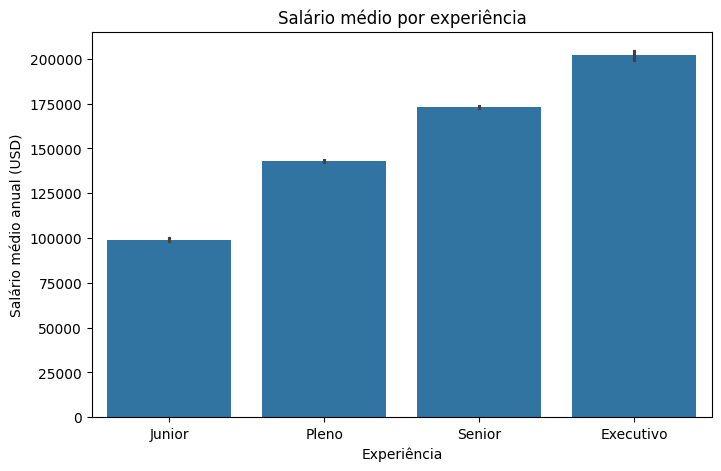

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='experiencia', y='salario_em_usd', order=ordem)
plt.title('Salário médio por experiência')
plt.xlabel('Experiência')
plt.ylabel('Salário médio anual (USD)')
plt.show()

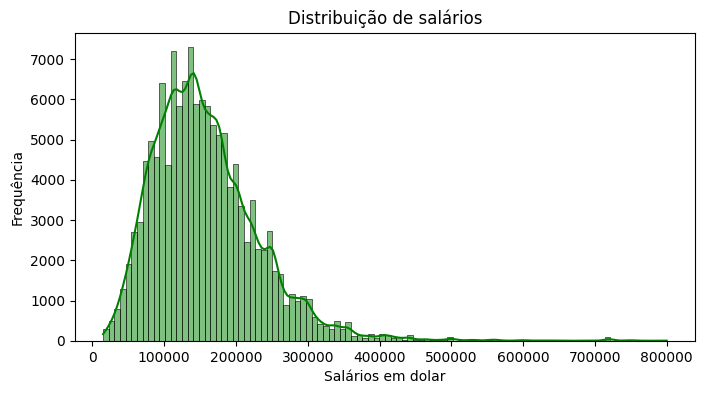

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['salario_em_usd'], bins=100, kde=True, color='green')
plt.title('Distribuição de salários')
plt.xlabel('Salários em dolar')
plt.ylabel('Frequência')
plt.show()

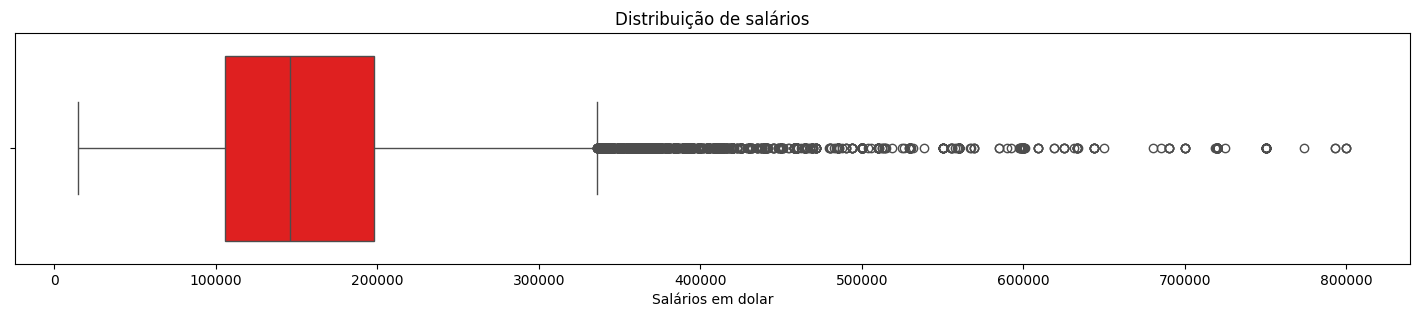

In [7]:
plt.figure(figsize=(18,3))
sns.boxplot(x=df_limpo['salario_em_usd'], color='red')
plt.title('Distribuição de salários')
plt.xlabel('Salários em dolar')
plt.show()

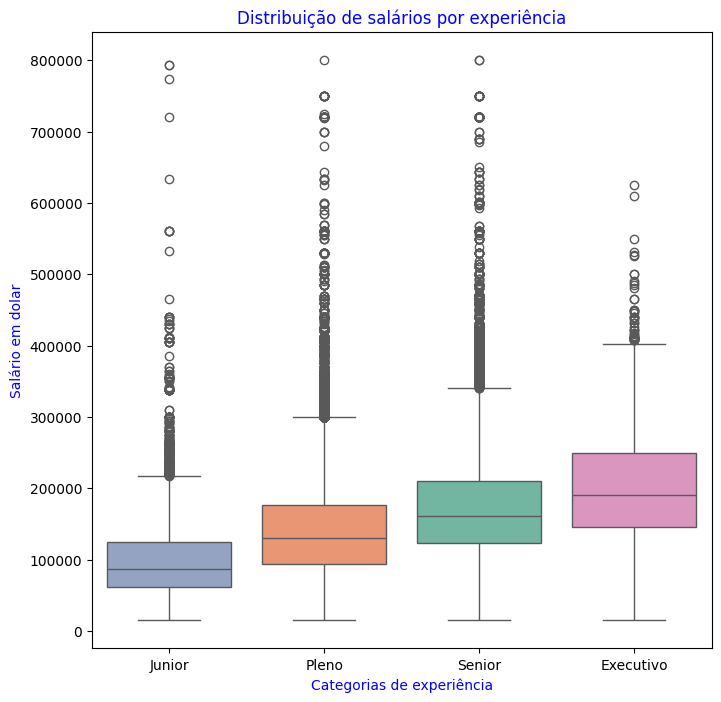

In [8]:
ordem_exp=['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,8))
sns.boxplot(x='experiencia', y='salario_em_usd', data=df_limpo, order=ordem_exp, palette='Set2', hue='experiencia')
plt.title('Distribuição de salários por experiência', color='blue')
plt.xlabel('Categorias de experiência', color='blue')
plt.ylabel('Salário em dolar', color='blue')
plt.show()

In [9]:
figura = px.bar(df_limpo.groupby('experiencia')['salario_em_usd'].mean().reset_index(),
             x='experiencia',
             y='salario_em_usd',
             category_orders={'experiencia': ordem_exp},
             labels={'salario_em_usd': 'Salário médio (USD)', 'experiencia': 'Experiência'},
             title='Salário médio por nível de experiência')

figura.show()

In [10]:
remoto_contagem= df_limpo['tipo_trabalho'].value_counts().reset_index()
remoto_contagem.columns= ['tipo', 'quantidade']

figura_pizza= px.pie(
    remoto_contagem,
    names='tipo',
    values='quantidade',
    title='Proporção dos tipos de trabalho'
)

figura_pizza.show()

In [11]:
remoto_contagem= df_limpo['tipo_trabalho'].value_counts().reset_index()
remoto_contagem.columns= ['tipo', 'quantidade']

figura_rosca= px.pie(
    remoto_contagem,
    names='tipo',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    hole=0.5
)

figura_rosca.update_traces(textinfo='percent+label')
figura_rosca.show()

In [12]:
def converter_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(converter_iso3)

In [13]:
df_cd= df_limpo[df_limpo['cargo'] == 'Data Scientist']

In [14]:
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,salario_em_usd,residencia,tipo_trabalho,localizacao_empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA
